# Оценка активностей контрольных образцов, измеренных на РУБ-01-П1.
____

### Импортируем библиотеки

In [24]:

import matplotlib.pyplot as plt
from turtle import color
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
# print(plt.style.available)
plt.style.use('ggplot')

### Строим функцию разделения данных по нуклиду

In [25]:
def K_Sr_split(data):
    data_K = data[data['sorce'].str.contains('K')]
    data_Sr = data[data['sorce'].str.contains('Sr')]
    return data_K, data_Sr

### Строим функций вычисления относительной и абсолютной погрешности

In [26]:
mass = [0.02, 0.05, 0.1, 0.15, 0.2, 0.25]
def relative_err_func(data, Act_BG):
    relative_err = ((data[mass] - Act_BG[mass]) * 100)/Act_BG[mass]
    relative_err['Total'] = relative_err.mean(axis = 1)
    relative_err['sorce'] = Act_BG['sorce']
    relative_err['sample_num'] = data['sample_num']
    return relative_err

def err_func(data, Act_BG):
    err = (data[mass] - Act_BG[mass])
    err['Total'] = err.mean(axis = 1)
    err['sorce'] = Act_BG['sorce']
    err['sample_num'] = data['sample_num']
    return err

### Данные, полученные на базе БелГидроМет

In [27]:
data = pd.DataFrame(columns=['sample_num', 0.02, 0.05, 0.1, 0.15, 0.200, 0.25])
data.loc[len(data.index)] = [1, 0.18, 0.23, 0.31, 0.54, 0.57, 0.64]
data.loc[len(data.index)] = [2, 0.37, 0.68, 1.58, 2.04, 2.61, 3.46]
data.loc[len(data.index)] = [3, 0.78, 1.29, 2.47, 4.35, 5.22, 5.84]
data.loc[len(data.index)] = [4, 1.52, 2.20, 4.31, 8.25, 9.10, 10.56]
data.loc[len(data.index)] = [5, 1.61, 4.39, 6.68, 10.03, 13.28, 15.36]
data.loc[len(data.index)] = [6, 0.52, 0.92, 1.52, 2.48, 2.61, 3.47]
data.loc[len(data.index)] = [7, 0.62, 0.78, 0.97, 1.14, 1.54, 1.83]
data.loc[len(data.index)] = [8, 0.28, 0.41, 1.01, 1.40, 1.68, 2.14]
data.loc[len(data.index)] = [9, 0.25, 0.70, 1.47, 1.67, 2.01, 2.50]
data.astype('float')


,sample_num,0.02,0.05,0.1,0.15,0.2,0.25
0,1.0,0.18,0.23,0.31,0.54,0.57,0.64
1,2.0,0.37,0.68,1.58,2.04,2.61,3.46
2,3.0,0.78,1.29,2.47,4.35,5.22,5.84
3,4.0,1.52,2.20,4.31,8.25,9.10,10.56
4,5.0,1.61,4.39,6.68,10.03,13.28,15.36
5,6.0,0.52,0.92,1.52,2.48,2.61,3.47
6,7.0,0.62,0.78,0.97,1.14,1.54,1.83
7,8.0,0.28,0.41,1.01,1.40,1.68,2.14
8,9.0,0.25,0.70,1.47,1.67,2.01,2.50


###  Данные по активности.

In [28]:
Act = pd.read_csv('Activity_BelGIM_sorces.csv')
Act_BG = pd.DataFrame(columns=['sample_num', 0.02, 0.05, 0.1, 0.15, 0.200, 0.25])
Act_BG['sample_num'] = [1, 2, 3, 4, 5, 6, 7, 8, 9]
for i in data['sample_num']:
    for j in data.columns[1:]:
        a = float(Act['Activity'][Act['sample_num'] == i].values)
        Act_BG[j][i-1] = j * a

Act_BG['sorce'] = Act[Act.columns[0]]
data['sorce'] = Act[Act.columns[0]]
Act_BG_K, Act_BG_Sr = K_Sr_split(Act_BG)
data_K, data_Sr = K_Sr_split(data)

Act_BG

C:\Users\fitu2\AppData\Local\Temp\ipykernel_15044\2953894738.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Act_BG[j][i-1] = j * a


,sample_num,0.02,0.05,0.1,0.15,0.2,0.25,sorce
0,1,0.0426,0.1065,0.213,0.3195,0.426,0.5325,Sr_1_A=2.13
1,2,0.2192,0.548,1.096,1.644,2.192,2.74,Sr_2_A=10.96
2,3,0.4206,1.0515,2.103,3.1545,4.206,5.2575,Sr_3_A=21.03
3,4,0.6112,1.528,3.056,4.584,6.112,7.64,Sr_4_A=30.56
4,5,0.9914,2.4785,4.957,7.4355,9.914,12.3925,Sr_5_A=49.57
5,6,0.292,0.73,1.46,2.19,2.92,3.65,K_1_A=14.6
6,7,0.148,0.37,0.74,1.11,1.48,1.85,K_2_A=7.4
7,8,0.206,0.515,1.03,1.545,2.06,2.575,K_3_A=10.3
8,9,0.24,0.6,1.2,1.8,2.4,3.0,K_4_A=12


### Визуальная оценка данных: как видно, данные, полученные от одного источника линейны в зависимости от массы навески

<AxesSubplot: >

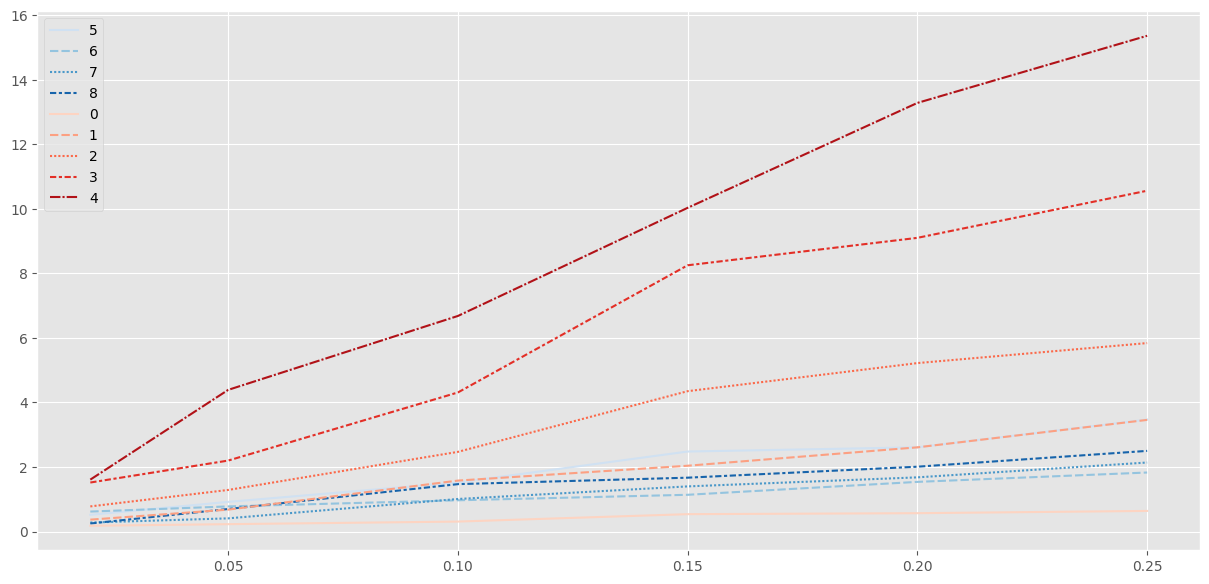

In [29]:
fig = plt.figure(figsize=(15, 7))

sns.lineplot(data_K[mass].T, palette='Blues')
sns.lineplot(data_Sr[mass].T, palette='Reds')


### Абсолютная погрешность

In [30]:
err = err_func(data, Act_BG)
err_K = err_func(data_K, Act_BG_K)
err_Sr = err_func(data_Sr, Act_BG_Sr)


<AxesSubplot: ylabel='sorce'>

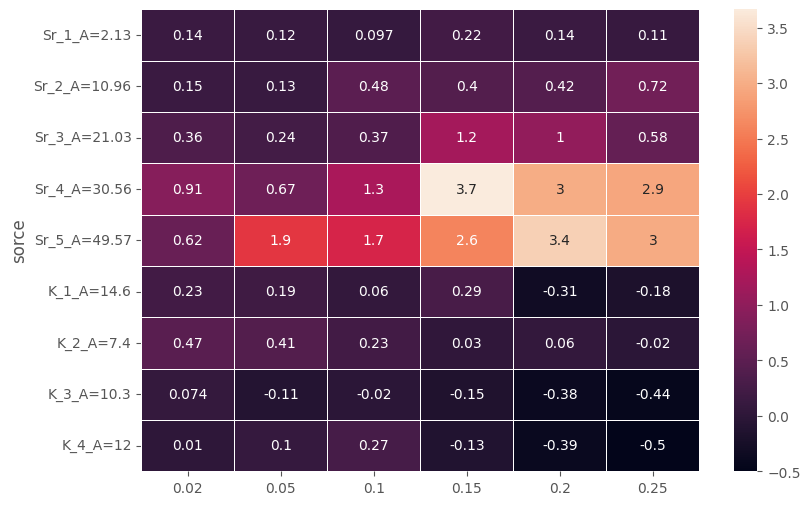

In [31]:
t = err[mass].astype('float')
t.index = err['sorce']
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(t, annot=True, linewidths=.5, ax=ax)


### Относительная погрешность

<AxesSubplot: ylabel='sorce'>

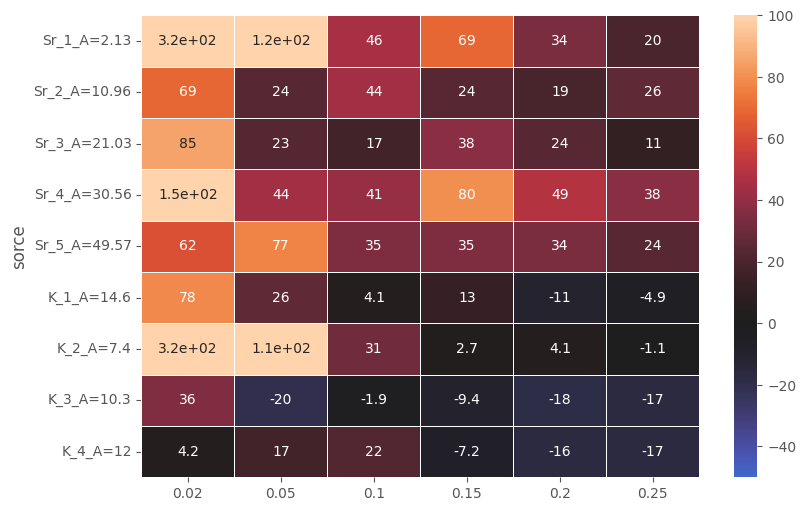

In [32]:
relative_err_All = relative_err_func(data, Act_BG)
relative_err_K = relative_err_func(data_K, Act_BG_K)
relative_err_Sr = relative_err_func(data_Sr, Act_BG_Sr)
rt = relative_err_All[mass].astype('float')
rt.index = relative_err_All['sorce']
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(rt, vmin=-50, vmax=100, center= 0, annot=True, linewidths=.5, ax=ax)

### Распределение абсолютной погрешности.

<AxesSubplot: xlabel='sorce'>

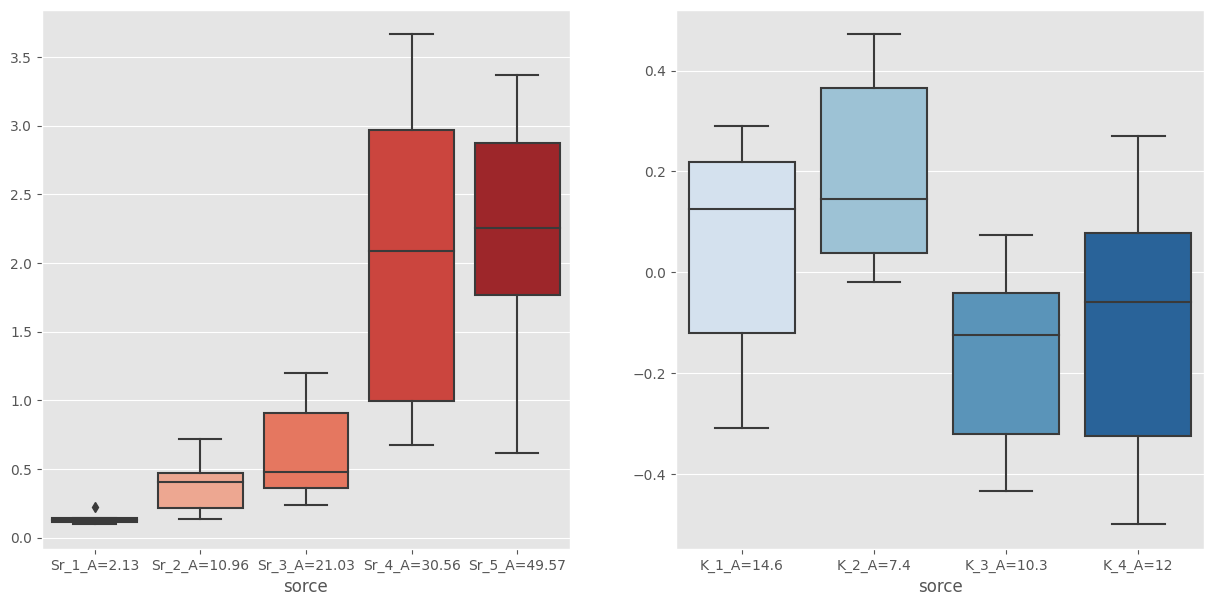

In [33]:
d = err[mass].T
d.columns = err['sorce']
d_K = err_K[mass].T
d_K.columns = err_K['sorce']
d_Sr = err_Sr[mass].T
d_Sr.columns = err_Sr['sorce']
d.to_csv('err_RYP.csv')

fig, ax = plt.subplots(1, 2, figsize=(15, 7))

sns.boxplot(d_Sr, palette='Reds', ax=ax[0])
sns.boxplot(d_K, palette='Blues', ax=ax[1] )




### Распределение относительной погрешности.

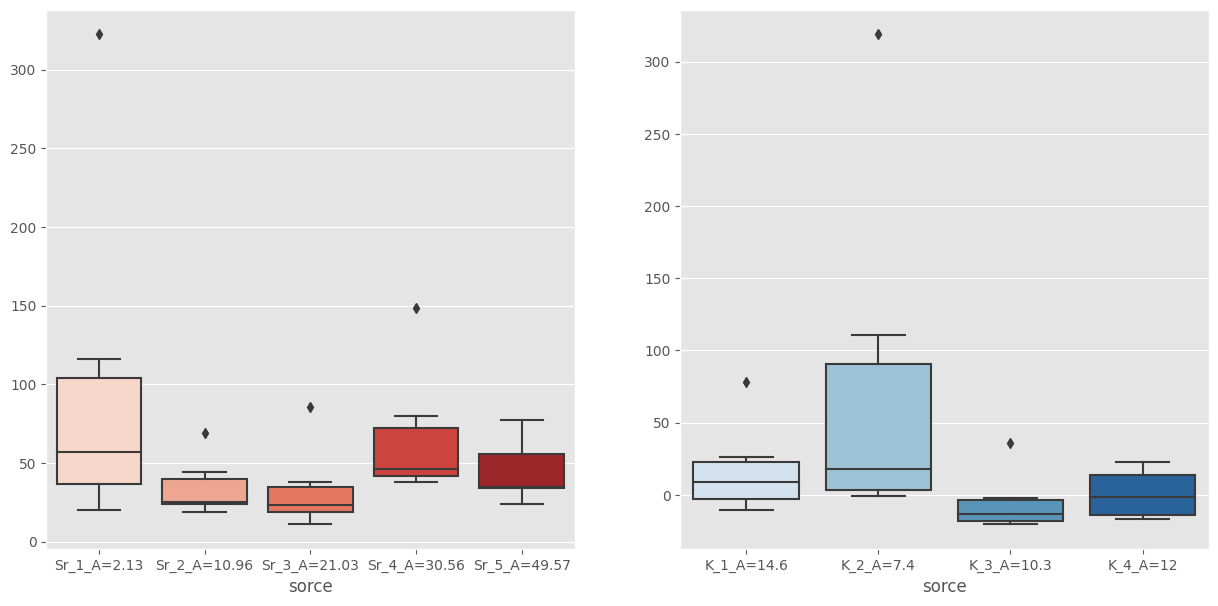

In [34]:
relative_d = relative_err_All[mass].T
relative_d.columns = relative_err_All['sorce']
relative_d_K = relative_err_K[mass].T
relative_d_K.columns = relative_err_K['sorce']
relative_d_Sr = relative_err_Sr[mass].T
relative_d_Sr.columns = relative_err_Sr['sorce']

fig, ax = plt.subplots(1, 2, figsize=(15, 7))

sns.boxplot(relative_d_Sr, palette='Reds', ax=ax[0])
sns.boxplot(relative_d_K, palette='Blues', ax=ax[1] )

relative_d.columns = Act_BG['sorce']
relative_d.to_csv('relativ_err_RYP.csv')
